In [9]:
from DemoScript import *
import matplotlib
import batch_params as params
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10,5]

import warnings
warnings.filterwarnings("ignore") 

In [10]:
matplotlib.rcParams['figure.figsize'] = [10,5]

First read the raw data and store only the points where proposition changes were observed

In [11]:
params.nTraj = 6
raw_data = read_raw_data(params.raw_data_path)
compressed_data = compress_data(raw_data)
write_data(params.compressed_data_path, compressed_data)
params.nSamples = 20000
params.nBurn = 500

In [12]:
infer_command = f'webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nTraj {params.nTraj}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Batch_Data/CompressedData' --outPath 'Batch_Distributions' --nTraj 6


**This is the final posterior. Plot the posterior**

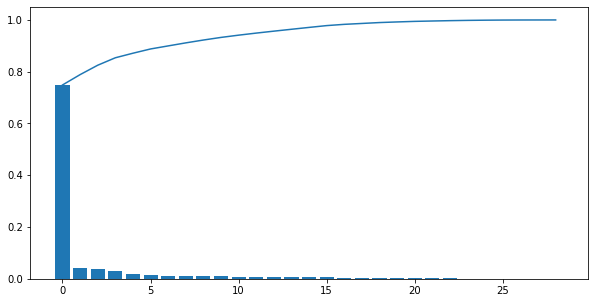

In [13]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

In [14]:
MDP.specification_fsm._formulas[2]

['and',
 ['F', ['W0']],
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['F', ['W4']],
 ['U', ['not', ['W2']], ['W0']],
 ['U', ['not', ['W1']], ['W4']]]